In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Udacity Data Analyst Nanodegree

## Project: Explore Weather Trends

### Introduction

For the "Explore Weather Trends" project I've decided to use Python, pandas and Jupyter because I'm already somewhat familiar with them and because everything I need (and much more) is provided by the frameworks.

The ``global_data`` and ``city_data`` tables were dumpled from Udacity's SQL workspace, downloaded in CSV format and then zipped. I chose to zip the files because I'm going to host this notebook and all related materials on a GitHub repository.

I've chosen the city of [Córdoba, Argentina](https://en.wikipedia.org/wiki/C%C3%B3rdoba,_Argentina) as the focus of the analysis, alongside another city in the southern hemisphere ([Melbourne, Australia](https://en.wikipedia.org/wiki/Melbourne)) and two in the northern hemisphere ([Dallas, United States](https://en.wikipedia.org/wiki/Dallas) and [Baghdad, Iraq](https://en.wikipedia.org/wiki/Baghdad)).

### Load data

In [2]:
global_data_df = pd.read_csv("data/global_data.csv.zip", compression="zip", index_col="year")

In [3]:
global_data_df.head()

,avg_temp
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


In [4]:
city_data_df = pd.read_csv("data/city_data.csv.zip", compression="zip")

In [5]:
city_data_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [6]:
argentina_data_df = city_data_df[city_data_df.country == "Argentina"]

In [7]:
argentina_data_df.head()

,year,city,country,avg_temp
16995,1855,Cordoba,Argentina,14.00
16996,1856,Cordoba,Argentina,16.23
16997,1857,Cordoba,Argentina,16.54
16998,1858,Cordoba,Argentina,16.22
16999,1859,Cordoba,Argentina,16.79


In [8]:
argentina_data_df.city.unique()  # Only Córdoba and Rosario are available?

array(['Cordoba', 'Rosario'], dtype=object)

In [9]:
cordoba_data_df = city_data_df[(city_data_df.city == "Cordoba") & (city_data_df.country == "Argentina")].set_index('year')

In [10]:
cordoba_data_df.head()

,city,country,avg_temp
year,,,
1855,Cordoba,Argentina,14.00
1856,Cordoba,Argentina,16.23
1857,Cordoba,Argentina,16.54
1858,Cordoba,Argentina,16.22
1859,Cordoba,Argentina,16.79


In [11]:
melbourne_data_df = city_data_df[(city_data_df.city == "Melbourne") & (city_data_df.country == "Australia")].set_index('year')
dallas_data_df = city_data_df[(city_data_df.city == "Dallas") & (city_data_df.country == "United States")].set_index('year')
baghdad_data_df = city_data_df[(city_data_df.city == "Baghdad") & (city_data_df.country == "Iraq")].set_index('year')

### Computing moving avergages

I've used pandas' [``DataFrame.rolling``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) and [``Series.mean``](https://pandas.pydata.org/docs/reference/api/pandas.Series.mean.html) to compute the moving averages as doing it manually would have certainly been cumbersome and error-prone.

I only had yearly temperature averages, so any winodws would have to be larger than that. I chose 5, 25 and 50 year windows to see if I could make different observations based on the window sizes.

In [12]:
for window in (5, 25, 50):
    cordoba_data_df[f"mean_{window}yrs"] = cordoba_data_df["avg_temp"].rolling(window).mean()
    melbourne_data_df[f"mean_{window}yrs"] = melbourne_data_df["avg_temp"].rolling(window).mean()
    dallas_data_df[f"mean_{window}yrs"] = dallas_data_df["avg_temp"].rolling(window).mean()
    baghdad_data_df[f"mean_{window}yrs"] = baghdad_data_df["avg_temp"].rolling(window).mean()
    global_data_df[f"mean_{window}yrs"] = global_data_df["avg_temp"].rolling(window).mean()
        

In [13]:
cordoba_data_df.head(20)

,city,country,avg_temp,mean_5yrs,mean_25yrs,mean_50yrs
year,,,,,,
1855,Cordoba,Argentina,14.00,NaN,NaN,NaN
1856,Cordoba,Argentina,16.23,NaN,NaN,NaN
1857,Cordoba,Argentina,16.54,NaN,NaN,NaN
1858,Cordoba,Argentina,16.22,NaN,NaN,NaN
1859,Cordoba,Argentina,16.79,15.956,NaN,NaN
1860,Cordoba,Argentina,16.45,16.446,NaN,NaN
1861,Cordoba,Argentina,16.27,16.454,NaN,NaN
1862,Cordoba,Argentina,16.32,16.410,NaN,NaN
1863,Cordoba,Argentina,15.86,16.338,NaN,NaN


In [14]:
global_data_df.head(20)

,avg_temp,mean_5yrs,mean_25yrs,mean_50yrs
year,,,,
1750,8.72,NaN,NaN,NaN
1751,7.98,NaN,NaN,NaN
1752,5.78,NaN,NaN,NaN
1753,8.39,NaN,NaN,NaN
1754,8.47,7.868,NaN,NaN
1755,8.36,7.796,NaN,NaN
1756,8.85,7.970,NaN,NaN
1757,9.02,8.618,NaN,NaN
1758,6.74,8.288,NaN,NaN


### Plotting the data

I used ``matplotlib`` to generate the charts, following the suggestions from [this blog post](https://deallen7.medium.com/how-to-make-a-line-plot-with-pandas-and-matplotlib-in-a-jupyter-notebook-27466ae089b8).

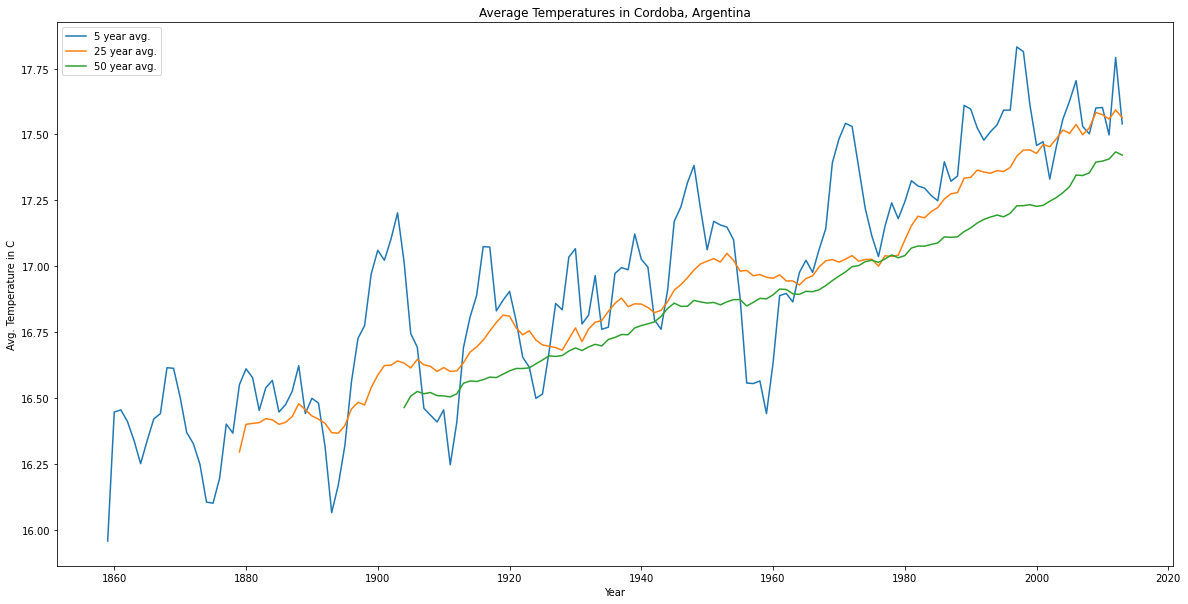

In [15]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_xlabel("Year")
ax.set_ylabel("Avg. Temperature in C")
ax.set_title("Average Temperatures in Cordoba, Argentina")
ax.plot(cordoba_data_df.mean_5yrs)
ax.plot(cordoba_data_df.mean_25yrs)
ax.plot(cordoba_data_df.mean_50yrs)
ax.legend(["5 year avg.", "25 year avg.", "50 year avg."])

This chart clearly shows that moving averages smooth (as mentioned in the lesson) out the curves making it easy to observe potential trends in the data. In this case, the 50 year average curve shows a clear upward trend in average temperature.

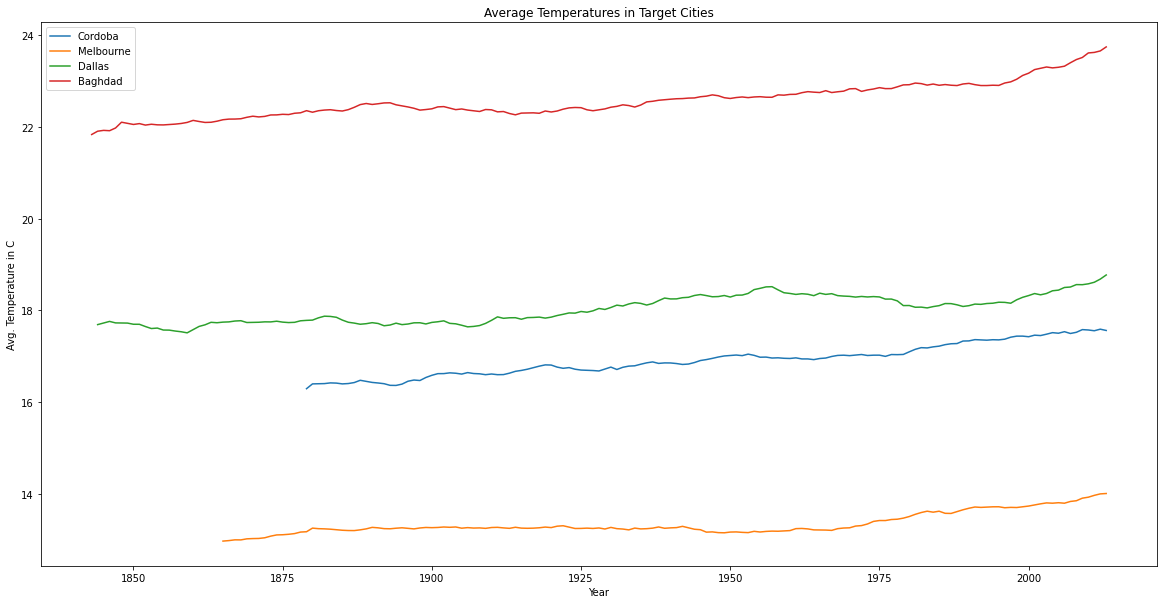

In [16]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_xlabel("Year")
ax.set_ylabel("Avg. Temperature in C")
ax.set_title("Average Temperatures in Target Cities")
ax.plot(cordoba_data_df.mean_25yrs)
ax.plot(melbourne_data_df.mean_25yrs)
ax.plot(dallas_data_df.mean_25yrs)
ax.plot(baghdad_data_df.mean_25yrs)
ax.legend(["Cordoba", "Melbourne", "Dallas", "Baghdad"])

The upwards trend is harder to see now (but it's there), but what's interesting about this chart are the clear similarities between Cordoba and Dallas (similar latitudes and climates, both landlocked) and their differences with Melbourne (coastal city) and Baghdad (straight up desert).

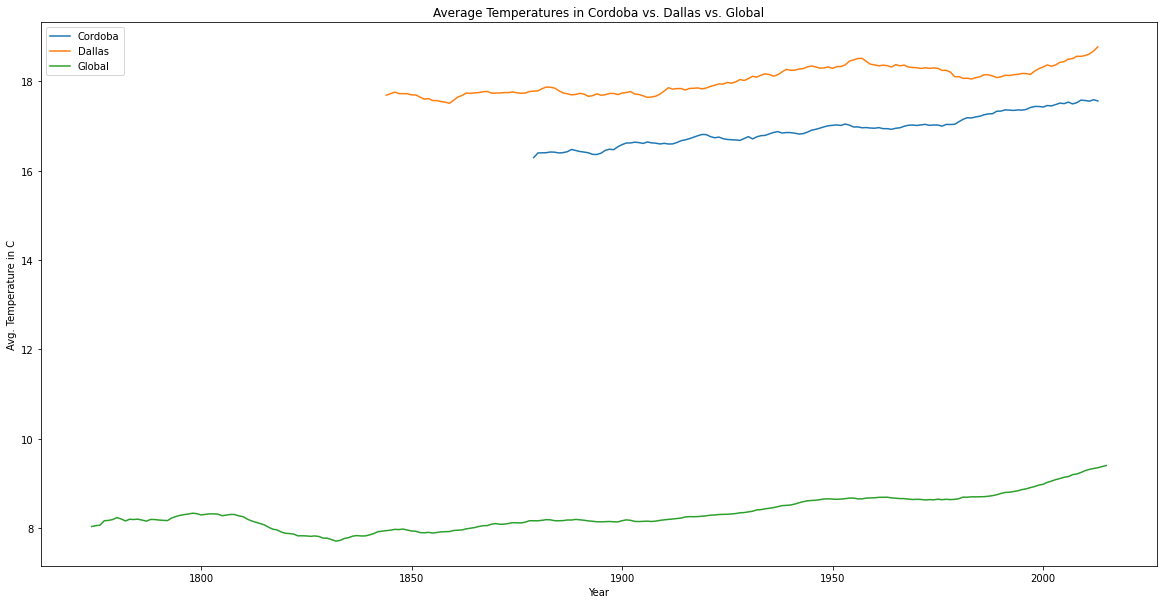

In [17]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
ax.set_xlabel("Year")
ax.set_ylabel("Avg. Temperature in C")
ax.set_title("Average Temperatures in Cordoba vs. Dallas vs. Global")
ax.plot(cordoba_data_df.mean_25yrs)
ax.plot(dallas_data_df.mean_25yrs)
ax.plot(global_data_df.mean_25yrs)
ax.legend(["Cordoba", "Dallas", "Global"])

The upwards trend since 1900 is somewhat clear, and we can see that Cordoba follows the trend of the global average. Once again I used pandas to get the [correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient) between Cordoba's and the global yearly averages, which clearly shows a correlation

In [18]:
cordoba_data_df.avg_temp.corr(global_data_df.avg_temp)

0.5793453951587677

The value is similar to the correlation coefficient between Dallas' and the global yearly avergages:

In [19]:
dallas_data_df.avg_temp.corr(global_data_df.avg_temp)

0.5737218176756127

However, Cordoba's and Dallas' data are not so strongly correlated:

In [20]:
cordoba_data_df.avg_temp.corr(dallas_data_df.avg_temp)

0.22637709501776718